In [15]:
from scipy.signal import butter, filtfilt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import wfdb
from pathlib import Path
import os
import neurokit2 as nk
import tensorflow as tf

In [3]:
file_path = Path('C:/Users/vinay/Downloads/mit-bih-arrhythmia-database-1.0.0/mit-bih-arrhythmia-database-1.0.0')
file_name = '100'
file = os.path.join(file_path, file_name)

In [4]:
signal, field = wfdb.rdsamp(file)
field

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

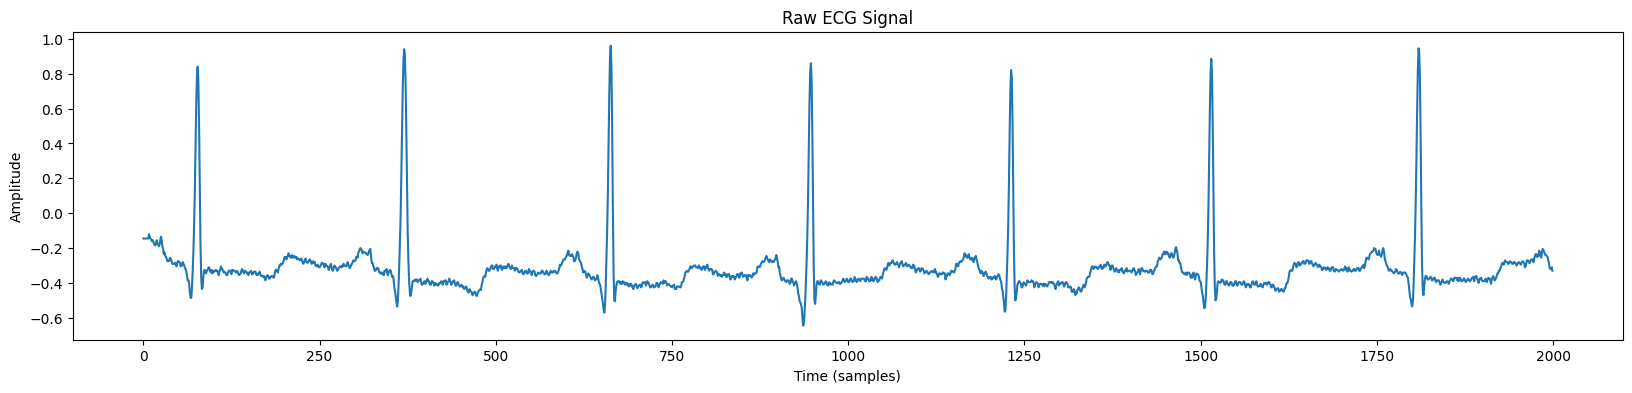

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(signal[:2000, 0])  # Plot the first channel
plt.title('Raw ECG Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [6]:
fs = 360
lowcut = 0.5
highcut = 45
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')
filtered_signal = filtfilt(b, a, signal[:, 0])

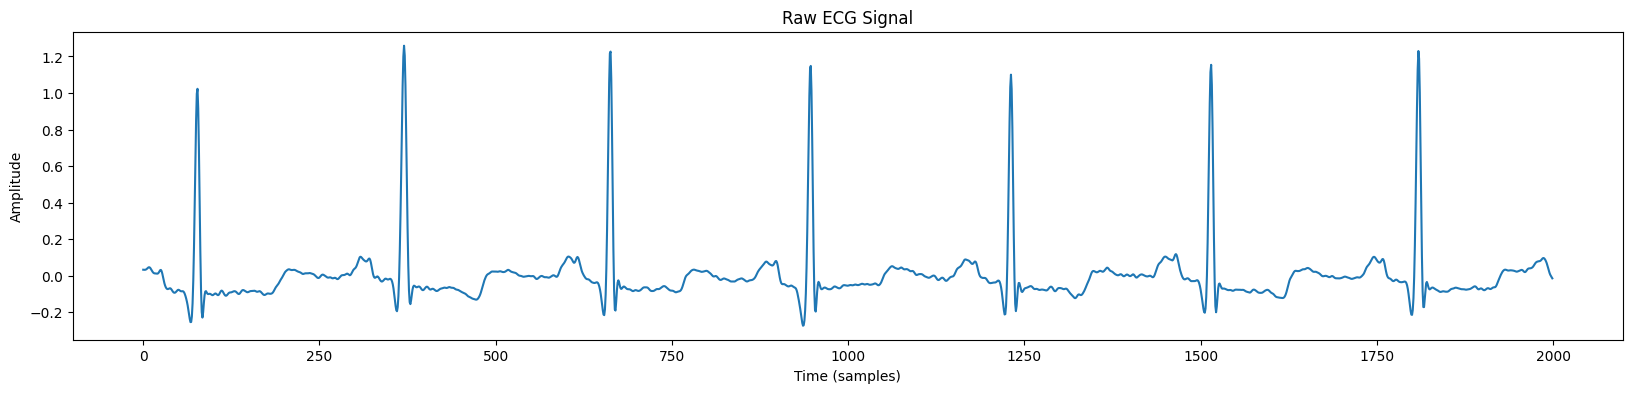

In [7]:
plt.figure(figsize=(20, 4))
plt.plot(filtered_signal[:2000]) 
plt.title('Raw ECG Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [8]:
coeffs = pywt.wavedec(filtered_signal, 'db6', level=9)
coeffs[0] = np.zeros_like(coeffs[0])  
coeffs[-1] = np.zeros_like(coeffs[-1])
coeffs[-2] = np.zeros_like(coeffs[-2])
coeffs[-3] = np.zeros_like(coeffs[-3])

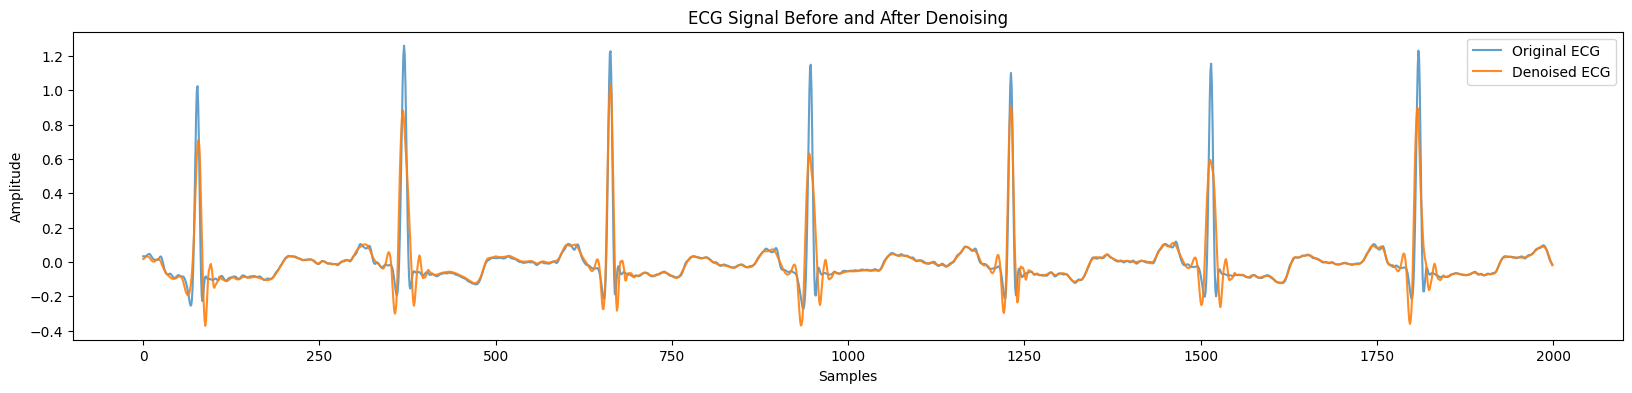

In [9]:
# Reconstruct the denoised signal using inverse wavelet transform
denoised_signal = pywt.waverec(coeffs, 'db6')

# Plot original and denoised signals
plt.figure(figsize=(20, 4))
plt.plot(filtered_signal[:2000], label="Original ECG", alpha=0.7)
plt.plot(denoised_signal[:2000], label="Denoised ECG", alpha=0.9) 
plt.legend()
plt.title("ECG Signal Before and After Denoising")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [10]:
signals, info = nk.ecg_process(denoised_signal, sampling_rate=360)
r_peaks = info["ECG_R_Peaks"]
print("R-peaks indices:", r_peaks)

R-peaks indices: [   369    663    946 ... 649231 649485 649734]


C:\Users\vinay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\neurokit2\ecg\ecg_plot.py:70: NeuroKitWarning: 'info' dict not provided. Some information might be missing. Sampling rate will be set to 1000 Hz.
  warn(


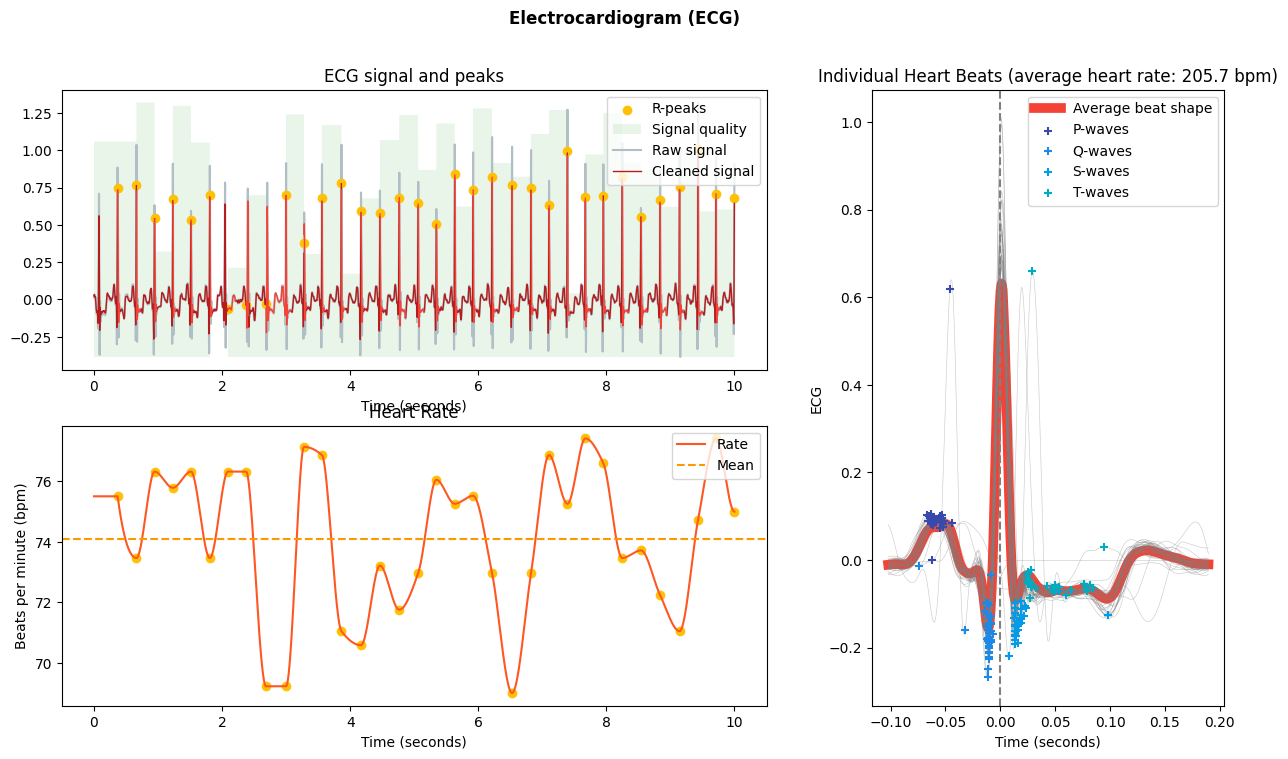

In [11]:
nk.ecg_plot(signals[:10000])
plt.gcf().set_size_inches(15, 8)  # Width: 12 inches, Height: 6 inches
plt.show()

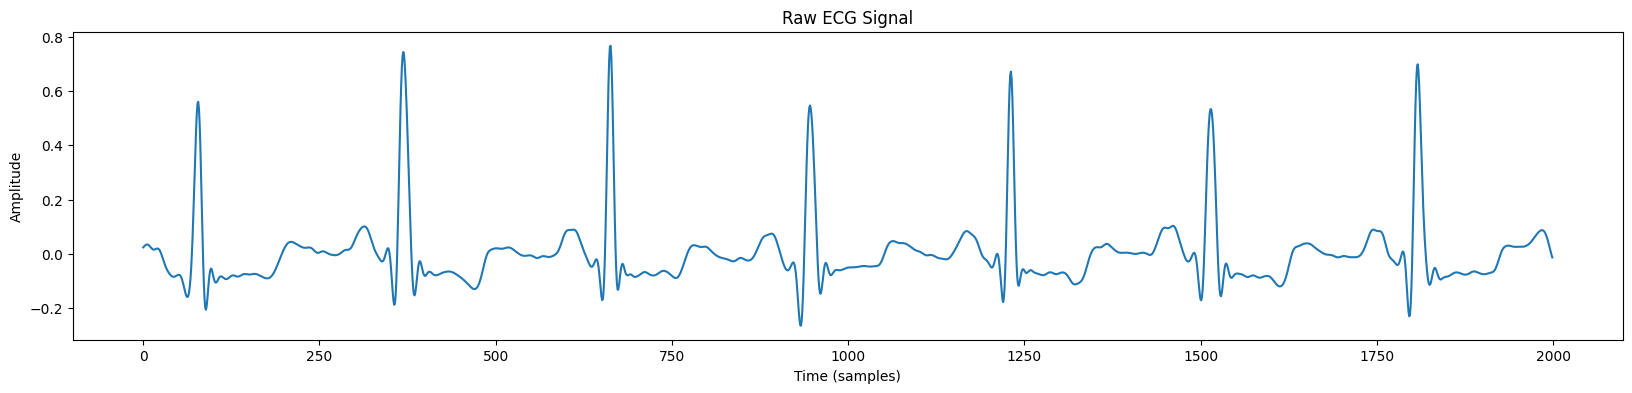

In [12]:
plt.figure(figsize=(20, 4))
plt.plot(signals.ECG_Clean[:2000]) 
plt.title('Raw ECG Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()